In [58]:
import pandas as pd;
import numpy as np
import matplotlib.pyplot as plt
input_data_path = r"C:\Users\evana\Google Drive\semester_two\infosys722\assignment\MSAS\MSAS\bank-additional\bank-additional-full.csv";
data=pd.read_csv(input_data_path,sep=";");

In [59]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [9]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
dataY=data[data["y"]=="yes"]
dataN=data[data["y"]=="no"]

In [40]:
import numpy as np
import matplotlib.pyplot as plt
def ShowGroupAndY(fields):
    for field in fields:
        ages = sorted(data[field].drop_duplicates())
#ages=ages[0:10]
        N = len(ages)
        #print(ages)
        AgeN = [(dataN[dataN[field]==age]["y"].count()*100/data[data[field]==age]["y"].count()) for age in ages]
       
        AgeY = [dataY[dataY[field]==age]["y"].count()*100/data[data[field]==age]["y"].count() for age in ages]
        ind = np.arange(N)    # the x locations for the groups
        width = 0.35       # the width of the bars: can also be len(x) sequence
       # AgeFull = [  100 for age in ages]
#print(AgeY)
#print(AgeN)
        p1 = plt.bar(ind, AgeN, width )
        p2 = plt.bar(ind, AgeY, width ,
             bottom=AgeN)

        plt.ylabel('count(*)')
        plt.title('count by group by '+field)
        if(len(ages)>20):
           # ind = np.arange(int(N/10))    # the x locations for the groups
           # print(ind)
            gap=10;
            if len(ages)>3000:
                gap=1000
            elif len(ages)>300:
                gap=100
            else:
                gap=10 
            xti_ages=[ ages[i] if (i%gap==0) else "" for i in ind]
            plt.xticks(ind, xti_ages , rotation='vertical' )
            #xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
        elif len(ages)>5:
            plt.xticks(ind, ages, rotation='vertical')
        else:
            plt.xticks(ind, ages )
        plt.yticks(np.arange(0, 100, 10))
        plt.legend((p1[0], p2[0]), ('No', 'Yes'))
        plt.show()

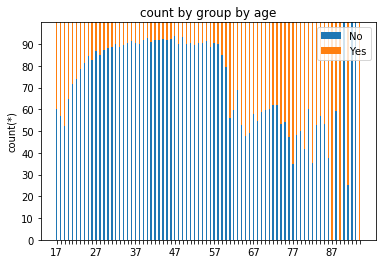

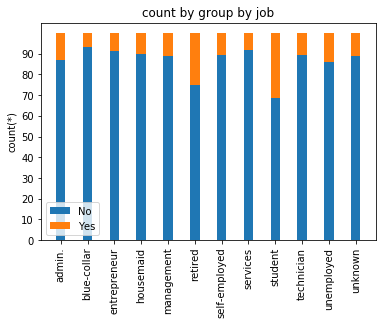

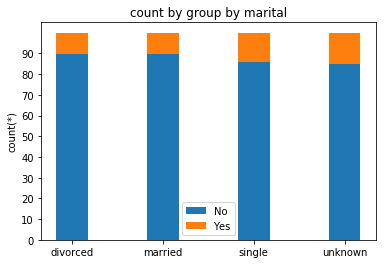

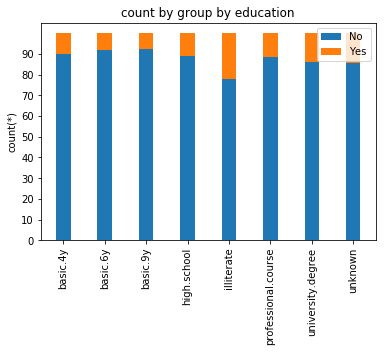

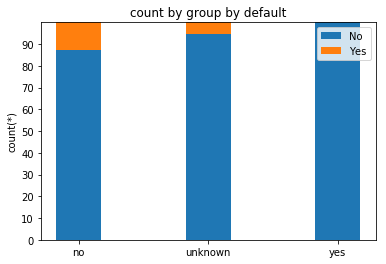

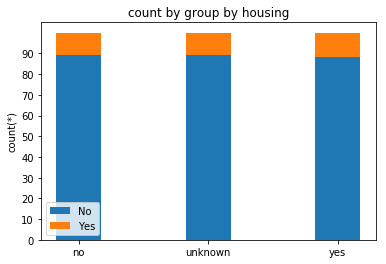

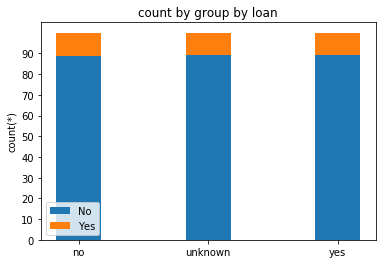

In [36]:
ShowGroupAndY(['age','job','marital','education','default','housing','loan'])

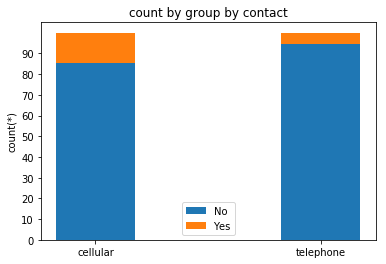

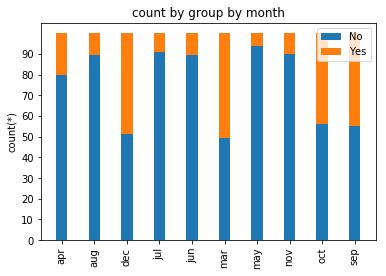

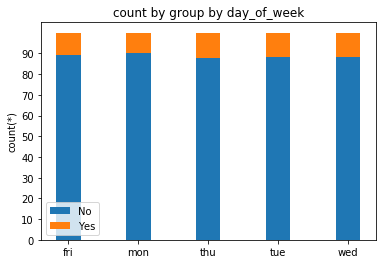

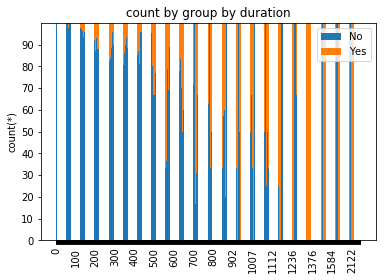

In [41]:
ShowGroupAndY(['contact','month','day_of_week','duration'])

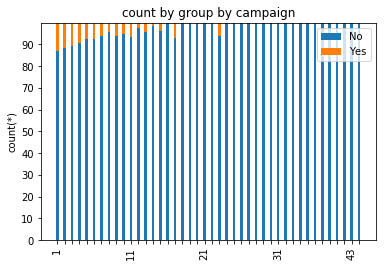

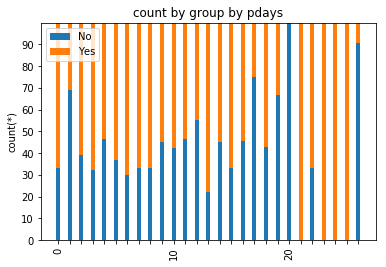

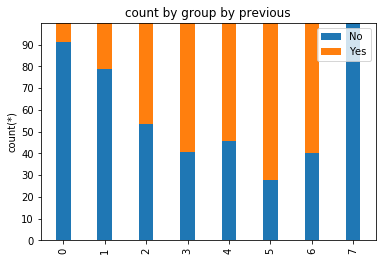

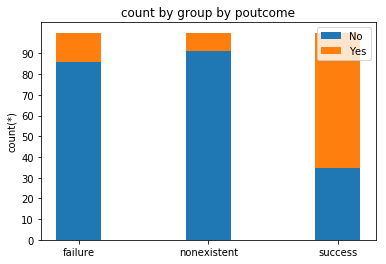

In [42]:
ShowGroupAndY(['campaign','pdays','previous','poutcome'])

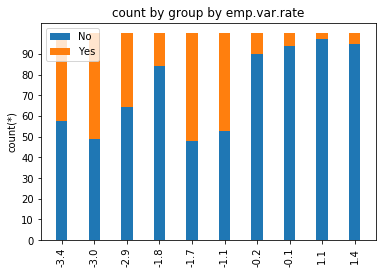

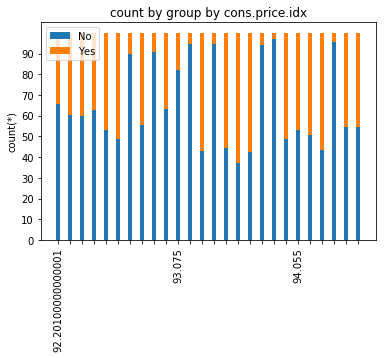

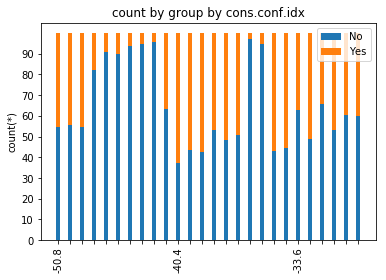

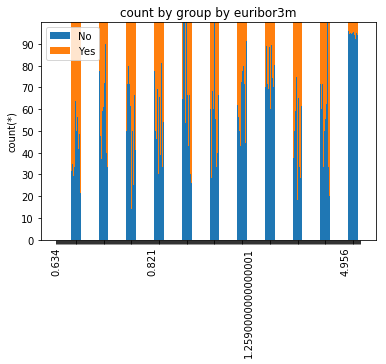

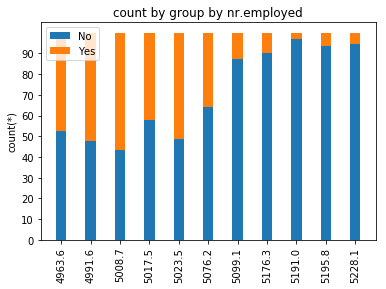

In [43]:
ShowGroupAndY(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']) 

In [44]:
data.groupby('job').age.agg(['mean','min', 'max','count' ])

,mean,min,max,count
job,,,,
admin.,38.187296,20,72,10422
blue-collar,39.555760,20,80,9254
entrepreneur,41.723214,20,69,1456
housemaid,45.500000,21,85,1060
management,42.362859,21,80,2924
retired,62.027326,23,98,1720
self-employed,39.949331,21,71,1421
services,37.926430,20,69,3969
student,25.894857,17,47,875


In [45]:
data.groupby('marital').age.agg(['mean','min', 'max','count' ])

,mean,min,max,count
marital,,,,
divorced,44.899393,24,95,4612
married,42.307165,20,98,24928
single,33.158714,17,86,11568
unknown,40.275000,25,66,80


In [46]:
data.groupby('education').age.agg(['mean','min', 'max','count' ])

,mean,min,max,count
education,,,,
basic.4y,47.596504,18,98,4176
basic.6y,40.448953,18,95,2292
basic.9y,39.061208,17,94,6045
high.school,37.998213,18,88,9515
illiterate,48.500000,34,80,18
professional.course,40.080107,20,86,5243
university.degree,38.879191,20,91,12168
unknown,43.481225,17,92,1731


In [62]:
def del_unknown(data):
    # fill_attrs = ["default"]
    del_attrs = ['job','marital','education','housing','loan']
    for i in del_attrs: 
        # delete col containing unknown
        data = data[data[i] != "unknown"]  
    return data

In [64]:
data=del_unknown(data)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 21 columns):
age               38245 non-null int64
job               38245 non-null object
marital           38245 non-null object
education         38245 non-null object
default           38245 non-null object
housing           38245 non-null object
loan              38245 non-null object
contact           38245 non-null object
month             38245 non-null object
day_of_week       38245 non-null object
duration          38245 non-null int64
campaign          38245 non-null int64
pdays             38245 non-null int64
previous          38245 non-null int64
poutcome          38245 non-null object
emp.var.rate      38245 non-null float64
cons.price.idx    38245 non-null float64
cons.conf.idx     38245 non-null float64
euribor3m         38245 non-null float64
nr.employed       38245 non-null float64
y                 38245 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [68]:
data=data.replace({'job':{'admin.':'admin'}})

In [75]:
data.groupby('education').age.agg(['mean','min', 'max','count' ])

,mean,min,max,count
education,,,,
illiterate,48.500000,34,80,18
primary,45.021431,18,98,6206
scecondary,38.412252,17,94,15100
tertiary,39.251699,20,91,16921


In [76]:
data=data.replace({'education':{'basic.4y':'primary','basic.6y':'primary','basic.9y':'scecondary',
                                'high.school' :'scecondary', 'professional.course' :'tertiary', 
                                'univeity.degree' :'tertiary'}})

In [93]:
data=data[(data["job"]!='retired')|(data["age"]>50)]

In [96]:
data['index_col'] = data.index


In [98]:
data=data.replace({'housing':{'yes':1,'no':0}})

In [105]:
data.groupby("education").age.agg(["min","max",'count'])

,min,max,count
education,,,
1,34,80,16
2,18,98,6156
3,17,94,15058
4,20,91,16901


In [104]:
data=data.replace({'education':{'illiterate':1,'primary':2,'scecondary':3,'tertiary':4}})

In [106]:
data['M1'] = data.marital.apply(lambda x: 1 if 'married' in x else 0)
data['M2'] = data.marital.apply(lambda x: 1 if 'single' in x else 0)

In [111]:

data=data.replace({'contact':{'cellular':1,'telephone':0}})
data=data.replace({'loan':{'yes':1,'no':0}})
data=data.replace({'default':{'yes':1,'no':0,'unknown':2}})
data=data.replace({'poutcome':{'failure':1,'nonexistent':2,'success':3}})

In [113]:
data=data.replace({'contact':{'cellular':1,'telephone':0}})